In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional,Activation 

In [ ]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df=pd.read_csv('/content/drive/My Drive/info1.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
237,11/21/2019,715.50,721.45,710.50,713.25,713.25,9692973
238,11/22/2019,711.75,712.00,685.10,693.20,693.20,14415826
239,11/25/2019,693.35,705.15,693.20,698.10,698.10,7334511
240,11/26/2019,705.00,707.25,686.00,690.60,690.60,27252999


In [ ]:
df.shape

(242, 7)

In [ ]:
plt.style.use('fivethirtyeight')

<function matplotlib.pyplot.show>

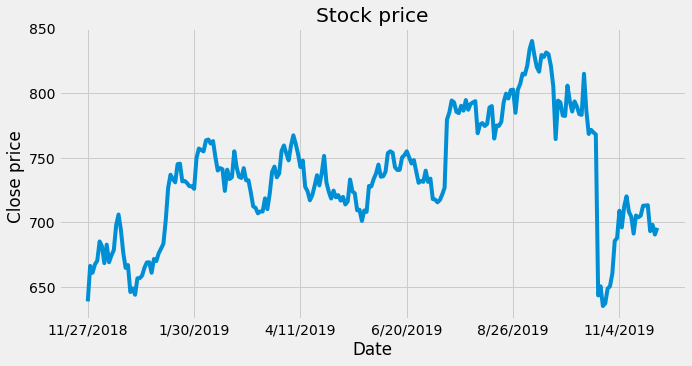

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Stock price')
plt.xlabel('Date')
plt.ylabel('Close price ')
plt.plot(df['Close'])
plt.xticks(np.arange(0,242,45),df['Date'][0:242:45])
plt.show

In [ ]:
data=df.filter(['Close']) #used to take out df['Close'] column out of whole df
dataset=data.values  #used to arrange df['Close'] in array format i.e [[638.9],[666,4],[..]....[]]
training_data_length=int(len(dataset)*0.8)
training_data_length

193

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1)) #used to define scaler which will one hot encode data between value 0 to 1
scaled_data=scaler.fit_transform(dataset)  #will apply scaler to original dataset
scaled_data

array([[0.01733398],
       [0.15161133],
       [0.12548828],
       [0.15673828],
       [0.17089844],
       [0.24365234],
       [0.22485352],
       [0.16186523],
       [0.23168945],
       [0.1652832 ],
       [0.19116211],
       [0.21069336],
       [0.3046875 ],
       [0.34521484],
       [0.28833008],
       [0.20141602],
       [0.14404297],
       [0.15478516],
       [0.05297852],
       [0.06665039],
       [0.04248047],
       [0.10473633],
       [0.10546875],
       [0.11523438],
       [0.14501953],
       [0.16455078],
       [0.16503906],
       [0.12548828],
       [0.17749023],
       [0.16943359],
       [0.19897461],
       [0.21655273],
       [0.23510742],
       [0.32495117],
       [0.44555664],
       [0.49536133],
       [0.47851563],
       [0.46679688],
       [0.53540039],
       [0.53710938],
       [0.47021484],
       [0.47192383],
       [0.46386719],
       [0.45214844],
       [0.4519043 ],
       [0.44213867],
       [0.55761719],
       [0.594

In [ ]:
train_data=scaled_data[0:training_data_length,:]
train_data.shape

(193, 1)

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])



x_train=np.array(x_train)
y_train=np.array(y_train)


x_train

array([[0.01733398, 0.15161133, 0.12548828, ..., 0.51611328, 0.43432617,
        0.5144043 ],
       [0.15161133, 0.12548828, 0.15673828, ..., 0.43432617, 0.5144043 ,
        0.47900391],
       [0.12548828, 0.15673828, 0.17089844, ..., 0.5144043 , 0.47900391,
        0.48632813],
       ...,
       [0.52392578, 0.51318359, 0.51367188, ..., 0.97021484, 1.        ,
        0.94604492],
       [0.51318359, 0.51367188, 0.56054688, ..., 1.        , 0.94604492,
        0.90209961],
       [0.51367188, 0.56054688, 0.5690918 , ..., 0.94604492, 0.90209961,
        0.8840332 ]])

In [ ]:
y_train

array([0.47900391, 0.48632813, 0.58374023, 0.52319336, 0.48779297,
       0.4831543 , 0.52026367, 0.47436523, 0.47436523, 0.42773438,
       0.37597656, 0.37060547, 0.34960938, 0.35693359, 0.35644531,
       0.40625   , 0.36547852, 0.42431641, 0.50585938, 0.52612305,
       0.4855957 , 0.50024414, 0.5847168 , 0.60571289, 0.57592773,
       0.54956055, 0.60522461, 0.64404297, 0.61157227, 0.57299805,
       0.52416992, 0.54882812, 0.44995117, 0.43334961, 0.39892578,
       0.41845703, 0.45336914, 0.49365234, 0.45507812, 0.5012207 ,
       0.56640625, 0.46606445, 0.4309082 , 0.40551758, 0.43554688,
       0.41015625, 0.41845703, 0.39794922, 0.41186523, 0.38330078,
       0.39428711, 0.47729492, 0.43237305, 0.42504883, 0.36108398,
       0.36328125, 0.32080078, 0.3605957 , 0.35522461, 0.45288086,
       0.45141602, 0.47949219, 0.5       , 0.53369141, 0.48803711,
       0.48950195, 0.5065918 , 0.5769043 , 0.58374023, 0.57836914,
       0.52392578, 0.51318359, 0.51367188, 0.56054688, 0.56909

In [ ]:
x_train.shape

(133, 60)

In [ ]:
y_train.shape

(133,)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train


array([[[0.01733398],
        [0.15161133],
        [0.12548828],
        ...,
        [0.51611328],
        [0.43432617],
        [0.5144043 ]],

       [[0.15161133],
        [0.12548828],
        [0.15673828],
        ...,
        [0.43432617],
        [0.5144043 ],
        [0.47900391]],

       [[0.12548828],
        [0.15673828],
        [0.17089844],
        ...,
        [0.5144043 ],
        [0.47900391],
        [0.48632813]],

       ...,

       [[0.52392578],
        [0.51318359],
        [0.51367188],
        ...,
        [0.97021484],
        [1.        ],
        [0.94604492]],

       [[0.51318359],
        [0.51367188],
        [0.56054688],
        ...,
        [1.        ],
        [0.94604492],
        [0.90209961]],

       [[0.51367188],
        [0.56054688],
        [0.5690918 ],
        ...,
        [0.94604492],
        [0.90209961],
        [0.8840332 ]]])

In [ ]:
model=Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True),input_shape=(60,1)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25))
model.add(Dense(1))
#model.add(Activation('softmax'))


In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

NameError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 60, 100)           20800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 25)                2525      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 83,751
Trainable params: 83,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=100)

Epoch 1/100
133/133 [==============================] - 5s 35ms/step - loss: 0.0029 - accuracy: 0.0075
Epoch 2/100
133/133 [==============================] - 5s 35ms/step - loss: 0.0029 - accuracy: 0.0075
Epoch 3/100
133/133 [==============================] - 5s 35ms/step - loss: 0.0028 - accuracy: 0.0075
Epoch 4/100
133/133 [==============================] - 5s 35ms/step - loss: 0.0028 - accuracy: 0.0075
Epoch 5/100
133/133 [==============================] - 5s 34ms/step - loss: 0.0029 - accuracy: 0.0075
Epoch 6/100
133/133 [==============================] - 5s 35ms/step - loss: 0.0026 - accuracy: 0.0075
Epoch 7/100
133/133 [==============================] - 5s 35ms/step - loss: 0.0028 - accuracy: 0.0075
Epoch 8/100
133/133 [==============================] - 4s 34ms/step - loss: 0.0029 - accuracy: 0.0075
Epoch 9/100
133/133 [==============================] - 5s 34ms/step - loss: 0.0026 - accuracy: 0.0075
Epoch 10/100
133/133 [==============================] - 5s 34ms/step - loss: 0.002

In [ ]:
#create test data
test_data=scaled_data[training_data_length-60:,:]
x_test=[]
y_test=dataset[training_data_length:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test=np.array(x_test)
  

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test.shape

(49, 60, 1)

In [ ]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction) #to convert data from one hot encoding to original format

In [ ]:
prediction.shape

(49, 1)

In [ ]:
y_test.shape

(49, 1)

In [ ]:
from sklearn.metrics import mean_squared_error
rm=np.sqrt(mean_squared_error(prediction,y_test))
print("Testing error is",rm)
#by changing no of epochs from 50 to 100 our error decresed drom 30 to 27

Testing error is 28.958353834489245


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'Lower right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


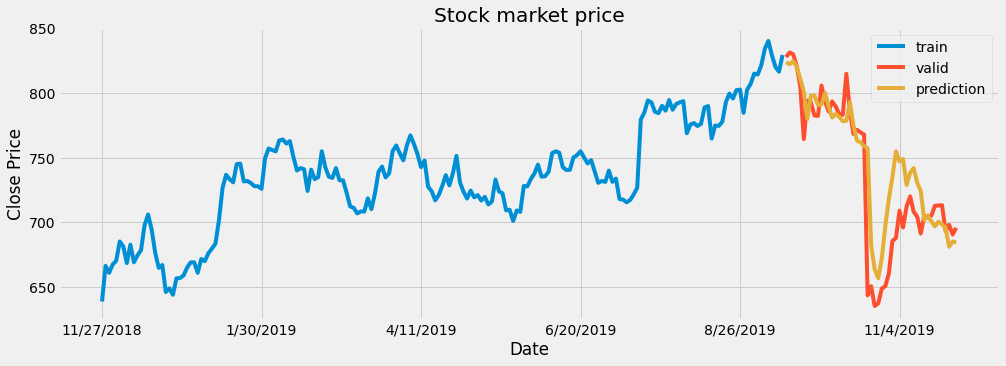

In [ ]:
train=data[:training_data_length]
valid=data[training_data_length:]
valid['Prediction']=prediction
plt.figure(figsize=(15,5))
plt.title('Stock market price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['train','valid','prediction'],loc='Lower right')
plt.xticks(np.arange(0,242,45),df['Date'][0:242:45])
plt.show()

In [ ]:
valid['Date']=df['Date'][training_data_length:]
valid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,Prediction,Date
193,827.70,823.694702,9/16/2019
194,831.25,822.197754,9/17/2019
195,829.85,824.412720,9/18/2019
196,820.70,820.372742,9/19/2019
197,805.00,810.843140,9/20/2019
198,764.35,800.988708,9/23/2019
199,794.05,779.833618,9/24/2019
200,792.65,797.843872,9/25/2019
201,782.55,797.929565,9/26/2019
202,782.20,790.612671,9/27/2019


In [ ]:
from tensorflow.keras.layers import GRU

model2=Sequential()
model2.add(GRU(50,return_sequences=True,input_shape=(60,1)))
model2.add(GRU(50))
model2.add(Dense(25))
model2.add(Dense(1))
#model2.add(Activation('softmax'))


In [ ]:
model2.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:
model2.fit(x_train,y_train,batch_size=1,epochs=100)

Epoch 1/100
133/133 [==============================] - 3s 24ms/step - loss: 0.0154 - accuracy: 0.0075
Epoch 2/100
133/133 [==============================] - 3s 24ms/step - loss: 0.0051 - accuracy: 0.0075
Epoch 3/100
133/133 [==============================] - 3s 23ms/step - loss: 0.0051 - accuracy: 0.0075
Epoch 4/100
133/133 [==============================] - 3s 23ms/step - loss: 0.0040 - accuracy: 0.0075
Epoch 5/100
133/133 [==============================] - 3s 23ms/step - loss: 0.0039 - accuracy: 0.0075
Epoch 6/100
133/133 [==============================] - 3s 23ms/step - loss: 0.0037 - accuracy: 0.0075
Epoch 7/100
133/133 [==============================] - 3s 23ms/step - loss: 0.0042 - accuracy: 0.0075
Epoch 8/100
133/133 [==============================] - 3s 23ms/step - loss: 0.0030 - accuracy: 0.0075
Epoch 9/100
133/133 [==============================] - 3s 23ms/step - loss: 0.0033 - accuracy: 0.0075
Epoch 10/100
133/133 [==============================] - 3s 23ms/step - loss: 0.003

In [ ]:
prediction2=model2.predict(x_test)
prediction2=scaler.inverse_transform(prediction2)

In [ ]:
from sklearn.metrics import mean_squared_error
rm2=np.sqrt(mean_squared_error(prediction2,y_test))
print("Testing error is",rm2)
#by changing no of epochs from 50 to 100 our error decresed drom 30 to 27

Testing error is 24.07582289777915


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'Lower right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


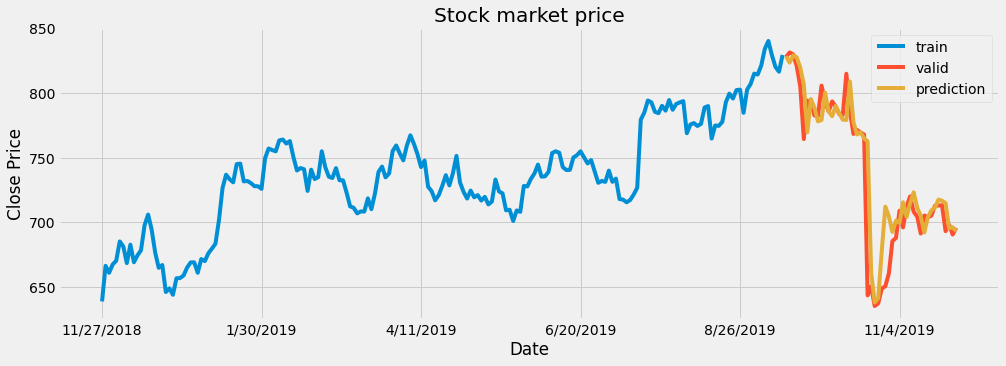

In [ ]:
train=data[:training_data_length]
valid=data[training_data_length:]
valid['Prediction']=prediction2
plt.figure(figsize=(15,5))
plt.title('Stock market price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['train','valid','prediction'],loc='Lower right')
plt.xticks(np.arange(0,242,45),df['Date'][0:242:45])
plt.show()

In [ ]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 60, 50)            7950      
_________________________________________________________________
gru_9 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dense_10 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 26        
Total params: 24,551
Trainable params: 24,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
valid['Date']=df['Date'][training_data_length:]
valid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,Prediction,Date
193,827.70,828.376587,9/16/2019
194,831.25,823.453003,9/17/2019
195,829.85,829.025024,9/18/2019
196,820.70,827.569824,9/19/2019
197,805.00,819.489868,9/20/2019
198,764.35,806.607483,9/23/2019
199,794.05,769.614624,9/24/2019
200,792.65,795.311829,9/25/2019
201,782.55,788.493164,9/26/2019
202,782.20,777.998657,9/27/2019
